In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn import preprocessing

In [721]:
data = pd.read_csv('fico-binary.csv')

In [722]:
data.head(5)

,ExternalRiskEstimate<0.49,ExternalRiskEstimate<0.65,ExternalRiskEstimate<0.80,NumSatisfactoryTrades<0.5,TradeOpenTime<0.6,TradeOpenTime<0.85,TradeFrequency<0.45,TradeFrequency<0.6,Delinquency<0.55,Delinquency<0.75,Installment<0.5,Installment<0.7,Inquiry<0.75,RevolvingBalance<0.4,RevolvingBalance<0.6,Utilization<0.6,TradeWBalance<0.33,RiskPerform
0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,1,0,0
1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1,0,1,0
2,0,0,1,0,0,0,0,0,1,1,1,1,0,0,1,1,0,0
3,0,0,1,1,0,1,0,1,1,1,0,1,0,0,0,0,0,0
4,1,1,1,0,1,1,0,1,1,1,1,1,0,0,0,1,0,0


In [725]:
# en = preprocessing.LabelEncoder()
# en.fit(['h','g'])

# newList = ['a1_2', 'a1_3', 'a1_4', 'a2_1', 'a2_2', 'a2_3', 'a2_4', 'a3_1', 'a3_2', 'a3_3', 'a3_4', 'a4_1', 'a4_2', 'a4_3', 'a4_4']
# newList =['f1','f2']
# newList = ['a1_high','a1_low','a1_med','a2_high','a2_low','a2_med','a3_2','a3_3','a3_4','a4_2','a4_4','a5_big','a5_med','a6_high','a6_low']
# newList = ['age','juv_crime','prior=0','prior=1','prior2-3','prior>3','two_year_recid']
# newList = ['PercentTradesWBalance','ExternalRiskEstimate','MSinceOldestTradeOpen','MSinceMostRecentTradeOpen','AverageMInFile','NumSatisfactoryTrades','NumTrades60Ever2DerogPubRec','NumTrades90Ever2DerogPubRec','PercentTradesNeverDelq','MSinceMostRecentDelq','MaxDelq2PublicRecLast12M','MaxDelqEver','NumTotalTrades','NumTradesOpeninLast12M','PercentInstallTrades','MSinceMostRecentInqexcl7days','NumInqLast6M','NumInqLast6Mexcl7days','NetFractionRevolvingBurden','NetFractionInstallBurden','NumRevolvingTradesWBalance','NumInstallTradesWBalance','NumBank2NatlTradesWHighUtilization']

newList = ["ExternalRiskEstimate<0.49","ExternalRiskEstimate<0.65","ExternalRiskEstimate<0.80","NumSatisfactoryTrades<0.5","TradeOpenTime<0.6","TradeOpenTime<0.85","TradeFrequency<0.45","TradeFrequency<0.6","Delinquency<0.55","Delinquency<0.75","Installment<0.5","Installment<0.7","Inquiry<0.75","RevolvingBalance<0.4","RevolvingBalance<0.6","Utilization<0.6","TradeWBalance<0.33"]
# newList = ['a1_1','a1_2','a2_1','a2_2','a3_1','a4_1','a4_2','a5_1','a5_2','a5_3','a6_1']
size = len(newList)
# data.loc[:,'class_1']

In [726]:
data.head()

,ExternalRiskEstimate<0.49,ExternalRiskEstimate<0.65,ExternalRiskEstimate<0.80,NumSatisfactoryTrades<0.5,TradeOpenTime<0.6,TradeOpenTime<0.85,TradeFrequency<0.45,TradeFrequency<0.6,Delinquency<0.55,Delinquency<0.75,Installment<0.5,Installment<0.7,Inquiry<0.75,RevolvingBalance<0.4,RevolvingBalance<0.6,Utilization<0.6,TradeWBalance<0.33,RiskPerform
0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,1,0,0
1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1,0,1,0
2,0,0,1,0,0,0,0,0,1,1,1,1,0,0,1,1,0,0
3,0,0,1,1,0,1,0,1,1,1,0,1,0,0,0,0,0,0
4,1,1,1,0,1,1,0,1,1,1,1,1,0,0,0,1,0,0


In [727]:
#cleanup_nums = {"class:":     {"g": 1, "h": 0}}
#data.replace(cleanup_nums, inplace=True)

In [441]:
#from warnings import simplefilter
#simplefilter(action='ignore', category=FutureWarning)
#simplefilter(action='ignore', category=Warning)

In [728]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate

In [729]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import sklearn.metrics as metrics

In [730]:
tdata = data
scaler = preprocessing.RobustScaler()
tdata[newList] = scaler.fit_transform(data[newList])

In [731]:
dlist = list(tdata)
train = dlist[0:size]
print(train)
predict = dlist[-1]
X = tdata[train]
Y = tdata[[predict]]
print(X)
print(Y)

['ExternalRiskEstimate<0.49', 'ExternalRiskEstimate<0.65', 'ExternalRiskEstimate<0.80', 'NumSatisfactoryTrades<0.5', 'TradeOpenTime<0.6', 'TradeOpenTime<0.85', 'TradeFrequency<0.45', 'TradeFrequency<0.6', 'Delinquency<0.55', 'Delinquency<0.75', 'Installment<0.5', 'Installment<0.7', 'Inquiry<0.75', 'RevolvingBalance<0.4', 'RevolvingBalance<0.6', 'Utilization<0.6', 'TradeWBalance<0.33']
       ExternalRiskEstimate<0.49  ExternalRiskEstimate<0.65  \
0                            0.0                       -1.0   
1                            0.0                       -1.0   
2                            0.0                       -1.0   
3                            0.0                       -1.0   
4                            1.0                        0.0   
...                          ...                        ...   
10454                        0.0                        0.0   
10455                        0.0                       -1.0   
10456                        0.0             

In [732]:
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.3)

In [733]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier(max_depth=size)
DT.fit(x_train,y_train)
DT_predicted = DT.predict(x_test)
DTC = DT.score(x_test,y_test)

In [734]:
print('Classification Report of Decision Tree Induction:\n')
print("\nAccuracy of DT: ",DTC*100,"%\n")
print(classification_report(y_test, DT_predicted))

Classification Report of Decision Tree Induction:


Accuracy of DT:  68.16443594646272 %

              precision    recall  f1-score   support

           0       0.67      0.76      0.71      1638
           1       0.69      0.60      0.64      1500

    accuracy                           0.68      3138
   macro avg       0.68      0.68      0.68      3138
weighted avg       0.68      0.68      0.68      3138



In [735]:
dt_cf = confusion_matrix(y_test,DT_predicted)

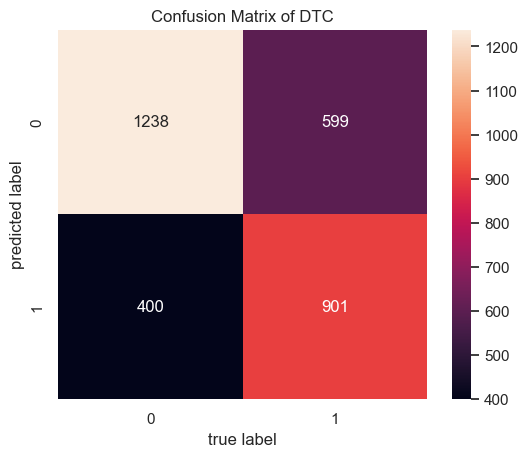

In [736]:
sns.heatmap(dt_cf.T, square=True, annot=True, fmt='d', cbar=True)
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.title('Confusion Matrix of DTC');

In [737]:
dt_fpr, dt_tpr, dt_threshold = metrics.roc_curve(y_test, DT_predicted)
dt_roc = metrics.auc(dt_fpr, dt_tpr)

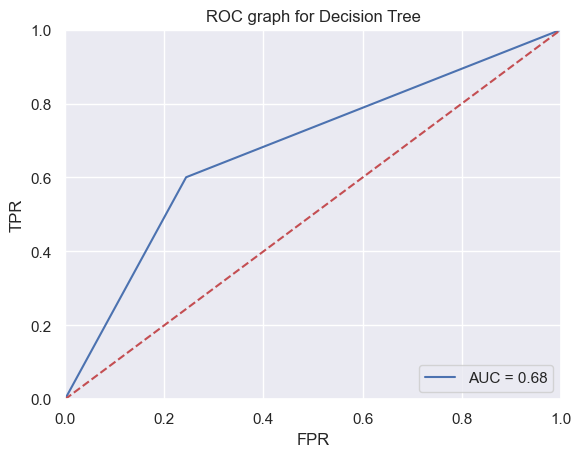

In [738]:
plt.title('ROC graph for Decision Tree')
plt.plot(dt_fpr, dt_tpr, label='AUC = %0.2f' %dt_roc)
plt.legend(loc = 'lower right')
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('TPR')
plt.xlabel('FPR')
plt.show()

In [739]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(n_estimators=100, n_jobs=-1, oob_score=True,bootstrap = True, max_features = 'sqrt')
RF.fit(x_train,y_train.values.ravel())
RF_predicted = RF.predict(x_test)
RFS = RF.score(x_test,y_test.values.ravel())

In [740]:
print('Classification Report of RFC:\n')
print("\nAccuracy of RFC: ",RFS*100,"%\n")
print(classification_report(y_test, RF_predicted))

Classification Report of RFC:


Accuracy of RFC:  69.47100063734864 %

              precision    recall  f1-score   support

           0       0.70      0.74      0.72      1638
           1       0.69      0.65      0.67      1500

    accuracy                           0.69      3138
   macro avg       0.69      0.69      0.69      3138
weighted avg       0.69      0.69      0.69      3138



In [741]:
rf_cf = confusion_matrix(y_test, RF_predicted)

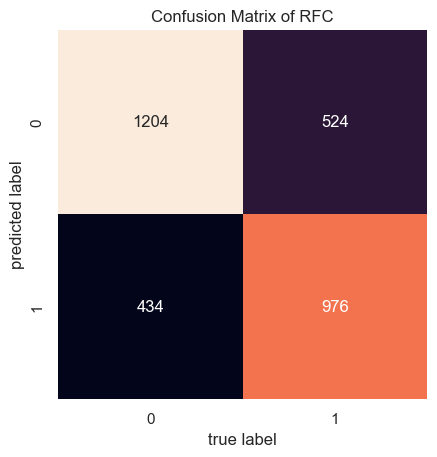

In [742]:
sns.heatmap(rf_cf.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')
#plt.xticks(tick_marks, classNames, rotation=45)
#plt.yticks(tick_marks, classNames)
plt.title('Confusion Matrix of RFC');

In [744]:
rf_fpr, rf_tpr, rf_threshold = metrics.roc_curve(y_test, RF_predicted)
rf_roc = metrics.auc(rf_fpr, rf_tpr)

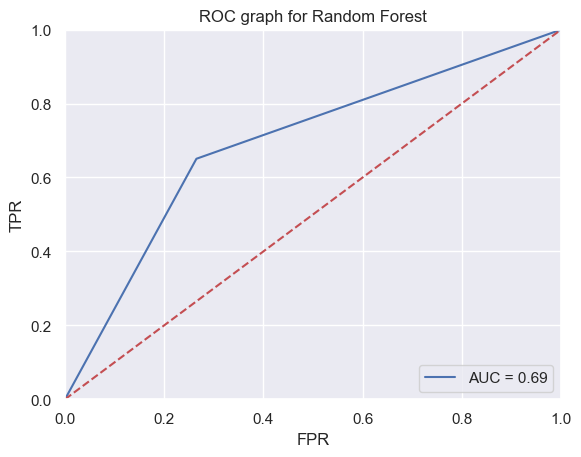

In [745]:
plt.title('ROC graph for Random Forest')
plt.plot(rf_fpr, rf_tpr, label='AUC = %0.2f' %rf_roc)
plt.legend(loc = 'lower right')
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('TPR')
plt.xlabel('FPR')
plt.show()

In [746]:
data_scaled = data

In [747]:
scaler = preprocessing.StandardScaler()
data_scaled[newList] = scaler.fit_transform(data_scaled[newList])
# scaler = preprocessing.RobustScaler()
# tdata[newList] = scaler.fit_transform(data[newList])

In [748]:
dslist = list(data_scaled)
strain = dslist[0:size]
spredict = dslist[-1]
Xs = data_scaled[strain]
Ys = data_scaled[[spredict]]
print(Xs)
print(Ys)
xs_train, xs_test, ys_train, ys_test = train_test_split(Xs,Ys,test_size=0.3)

       ExternalRiskEstimate<0.49  ExternalRiskEstimate<0.65  \
0                      -0.738949                  -1.015902   
1                      -0.738949                  -1.015902   
2                      -0.738949                  -1.015902   
3                      -0.738949                  -1.015902   
4                       1.353273                   0.984347   
...                          ...                        ...   
10454                  -0.738949                   0.984347   
10455                  -0.738949                  -1.015902   
10456                  -0.738949                   0.984347   
10457                  -0.738949                   0.984347   
10458                  -0.738949                  -1.015902   

       ExternalRiskEstimate<0.80  NumSatisfactoryTrades<0.5  \
0                      -1.949901                  -0.836883   
1                      -1.949901                  -0.836883   
2                       0.512847                  -0.8

In [749]:
from sklearn.svm import LinearSVC
SV = LinearSVC(max_iter = 10000)
SV.fit(x_train,y_train.values.ravel())
SV_predicted = SV.predict(x_test)
SVS = SV.score(x_test,y_test.values.ravel())

In [750]:
print('Classification Report of SVM:\n')
print("\nAccuracy of SVC: ",SVS*100,"%\n")
print(classification_report(y_test, SV_predicted))

Classification Report of SVM:


Accuracy of SVC:  72.68961121733588 %

              precision    recall  f1-score   support

           0       0.75      0.72      0.73      1638
           1       0.71      0.74      0.72      1500

    accuracy                           0.73      3138
   macro avg       0.73      0.73      0.73      3138
weighted avg       0.73      0.73      0.73      3138



In [752]:
sv_cf = confusion_matrix(y_test,SV_predicted)

In [753]:
print(sv_cf)

[[1176  462]
 [ 395 1105]]


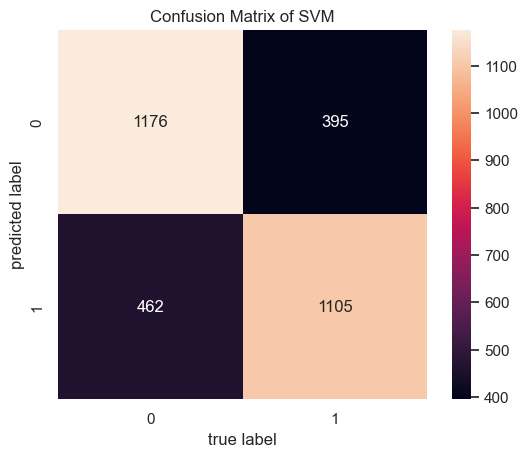

In [754]:
sns.heatmap(sv_cf.T, square=True, annot=True, fmt='d', cbar=True)
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.title('Confusion Matrix of SVM');

In [755]:
sv_fpr, sv_tpr, sv_threshold = metrics.roc_curve(y_test, SV_predicted)
sv_roc = metrics.auc(sv_fpr, sv_tpr)

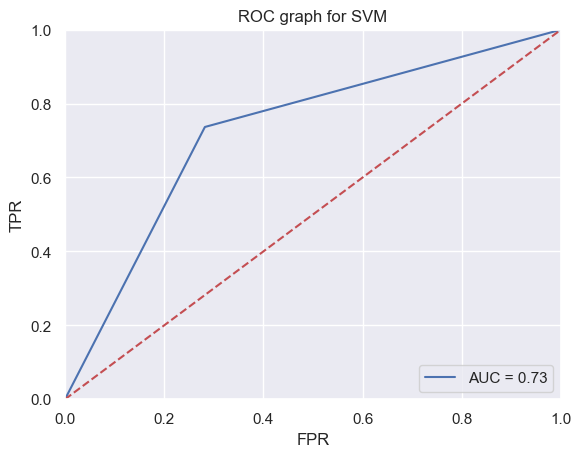

In [756]:
plt.title('ROC graph for SVM')
plt.plot(sv_fpr, sv_tpr, label='AUC = %0.2f' %sv_roc)
plt.legend(loc = 'lower right')
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('TPR')
plt.xlabel('FPR')
plt.show()

In [757]:
data_norm = data

In [758]:
normalizer = preprocessing.Normalizer()
data_norm[newList] = normalizer.fit_transform(data_norm[newList])

In [759]:
dnlist = list(data_norm)
ntrain = dnlist[0:size]
npredict = dlist[-1]
Xn = data_norm[ntrain]
Yn = data_norm[[npredict]]
xn_train, xn_test, yn_train, yn_test = train_test_split(Xn,Yn,test_size=0.2)

In [760]:
from sklearn.naive_bayes import GaussianNB
NB = GaussianNB()
NB.fit(x_train,y_train.values.ravel())
NB_predicted = NB.predict(x_test)
NBS = NB.score(x_test,y_test.values.ravel())

In [761]:
print('Classification Report of Naive Bayes:\n')
print("\nAccuracy of Naive Bayes: ",NBS*100,"%\n")
print(classification_report(y_test, NB_predicted))

Classification Report of Naive Bayes:


Accuracy of Naive Bayes:  71.1281070745698 %

              precision    recall  f1-score   support

           0       0.77      0.63      0.70      1638
           1       0.67      0.80      0.73      1500

    accuracy                           0.71      3138
   macro avg       0.72      0.71      0.71      3138
weighted avg       0.72      0.71      0.71      3138



In [762]:
nb_cf = confusion_matrix(y_test,NB_predicted)

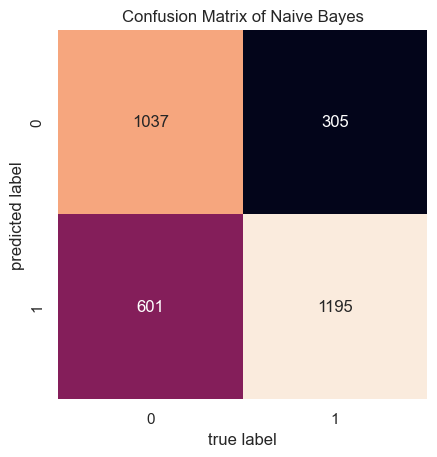

In [763]:
sns.heatmap(nb_cf.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.title('Confusion Matrix of Naive Bayes');

In [764]:
nb_fpr, nb_tpr, nb_threshold = metrics.roc_curve(y_test, NB_predicted)
nb_roc = metrics.auc(nb_fpr, nb_tpr)

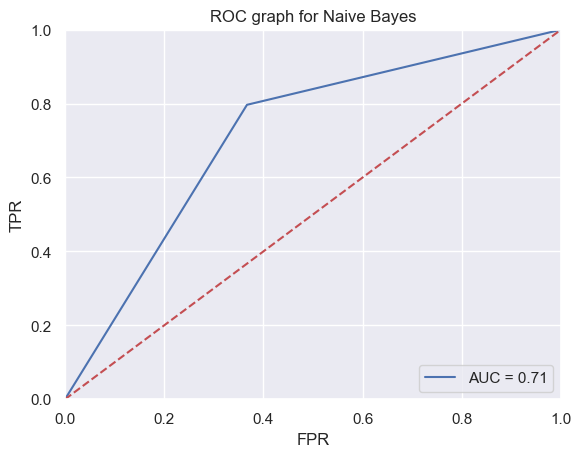

In [765]:
plt.title('ROC graph for Naive Bayes')
plt.plot(nb_fpr, nb_tpr, label='AUC = %0.2f' %nb_roc)
plt.legend(loc = 'lower right')
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('TPR')
plt.xlabel('FPR')
plt.show()

In [766]:
rf_TP = rf_cf[0][0]
rf_FP = rf_cf[0][1]
rf_FN = rf_cf[1][0]
rf_TN = rf_cf[1][1]

In [767]:
rf_FP = rf_FP.astype(float)
rf_TP = rf_TP.astype(float)
rf_FN = rf_FN.astype(float)
rf_TN = rf_TN.astype(float)

In [768]:
#Sensitivity, recall, TPR
rf_TPR = rf_TP / (rf_TP + rf_FN)
#FPR
rf_FPR = rf_FP / (rf_FP + rf_TN)
#Specifity, TNR
rf_TNR = rf_TN / (rf_TN + rf_FP)
#Precision
rf_PRE = rf_TP / (rf_TP + rf_FP)
#Accuracy
rf_ACC = (rf_TP + rf_TN) / (rf_TP + rf_FP + rf_FN + rf_TN)

In [769]:
print("TPR of Random Forest: " ,rf_TPR)
print("FPR of Random Forest: " ,rf_FPR)

TPR of Random Forest:  0.6967592592592593
FPR of Random Forest:  0.3078014184397163


In [770]:
sv_TP = sv_cf[0][0]
sv_FP = sv_cf[0][1]
sv_FN = sv_cf[1][0]
sv_TN = sv_cf[1][1]
sv_FP = sv_FP.astype(float)
sv_TP = sv_TP.astype(float)
sv_FN = sv_FN.astype(float)
sv_TN = sv_TN.astype(float)

In [771]:
#Sensitivity, recall, TPR
sv_TPR = sv_TP / (sv_TP + sv_FN)
#FPR
sv_FPR = sv_FP / (sv_FP + sv_TN)

In [772]:
print("TPR of SVM: " ,sv_TPR)
print("FPR of SVM: " ,sv_FPR)

TPR of SVM:  0.7485677912157861
FPR of SVM:  0.2948308870453095


In [773]:
DT_TP = dt_cf[0][0]
DT_FP = dt_cf[0][1]
DT_FN = dt_cf[1][0]
DT_TN = dt_cf[1][1]
DT_FP = DT_FP.astype(float)
DT_TP = DT_TP.astype(float)
DT_FN = DT_FN.astype(float)
DT_TN = DT_TN.astype(float)

In [774]:
#Sensitivity, recall, TPR
DT_TPR = DT_TP / (DT_TP + DT_FN)
#FPR
DT_FPR = DT_FP / (DT_FP + DT_TN)

In [777]:
print("TPR of Decision Tree: " ,DT_TPR)
print("FPR of Decision Tree: " ,DT_FPR)

TPR of Decision Tree:  0.6739248775176919
FPR of Decision Tree:  0.3074558032282859


In [776]:
BN_TP = nb_cf[0][0]
BN_FP = nb_cf[0][1]
BN_FN = nb_cf[1][0]
BN_TN = nb_cf[1][1]
BN_FP = BN_FP.astype(float)
BN_TP = BN_TP.astype(float)
BN_FN = BN_FN.astype(float)
BN_TN = BN_TN.astype(float)
#Sensitivity, recall, TPR
BN_TPR = BN_TP / (BN_TP + BN_FN)
#FPR
BN_FPR = BN_FP / (BN_FP + BN_TN)
print("TPR of Naive Bayes: " ,BN_TPR)
print("FPR of Naive Bayes: " ,BN_FPR)

TPR of Naive Bayes:  0.7727272727272727
FPR of Naive Bayes:  0.3346325167037862
